In [2]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from iminuit import Minuit
import matplotlib.cm as cm
from scipy.optimize import curve_fit
import os
import bened as ben

c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\gammagit\bened.py:248: SyntaxWarning: invalid escape sequence '\c'
  print(f'Chi-squared $\chi^2$ = {chi_squared}')
c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\gammagit\bened.py:249: SyntaxWarning: invalid escape sequence '\c'
  print(f'Reduced chi-squared $\chi^2_r$ = {chi_squared_reduced}')
c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\gammagit\bened.py:342: SyntaxWarning: invalid escape sequence '\c'
  print(f'Chi-squared $\chi^2$ = {chi_squared}')
c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\gammagit\bened.py:343: SyntaxWarning: invalid escape sequence '\c'
  print(f'Reduced chi-squared $\chi^2_r$ = {chi_squared_reduced}')


# GAMMA XDVR

## calibration

In [3]:
#giorno2
americio = uproot.open('group23\\10min-americio-gr23\\RAW\\DataR_10min-americio-gr23.root')
sodio = uproot.open('group23\\10min-sodio-gr23-SOGLIA\\RAW\\DataR_10min-sodio-gr23-SOGLIA.root')
europio = uproot.open('group23\\20min-europio-gr23\\RAW\\DataR_20min-europio-gr23.root')
back2 = uproot.open('group23\\30min-background-gr23\\RAW\\DataR_30min-background-gr23.root')
#giorno3
autunite = uproot.open('group23\\15min-autunite-gr23\\RAW\\DataR_15min-autunite-gr23.root')
enea = uproot.open('group23\\15min-Enea-water-gr23\\RAW\\DataR_15min-Enea-water-gr23.root')
porcini = uproot.open('group23\\15min-porcini-mushrooms-gr23\\RAW\\DataR_15min-porcini-mushrooms-gr23.root')
cement = uproot.open('group23\\15min-portland-cement-gr23\\RAW\\DataR_15min-portland-cement-gr23.root')
potassio = uproot.open('group23\\15min-potassio-gr23\\RAW\\DataR_15min-potassio-gr23.root')
zirconio = uproot.open('group23\\15min-zirconium-oxide-gr23\\RAW\\DataR_15min-zirconium-oxide-gr23.root')
back3 = uproot.open('group23\\15min-background-gr23-giorno3\\RAW\\DataR_15min-background-gr23.root')
#radon
exposed = uproot.open('group23\\30min-exposed-radon-gr23\\RAW\\DataR_30min-exposed-radon-gr23.root')
unexposed =uproot.open('group23\\30min-non-exposed-radon-gr23\\RAW\\DataR_30min-non-exposed-radon-gr23.root')
calibrated = uproot.open('group23\\30min-calibrated-radon-gr23\\RAW\\DataR_30min-calibrated-radon-gr23.root')

In [4]:
energy_americio = np.array(americio['Data_R;3']['Energy'].array())
energy_sodio = np.array(sodio['Data_R;6']['Energy'].array())
energy_europio = np.array(europio['Data_R;6']['Energy'].array())
fondo2giorno = np.array(back2['Data_R;4']['Energy'].array())

fondo3giorno = np.array(back3['Data_R;5']['Energy'].array())

C:\Users\Utente\AppData\Local\Temp\ipykernel_308\517752143.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  energy_americio = np.array(americio['Data_R;3']['Energy'].array())
C:\Users\Utente\AppData\Local\Temp\ipykernel_308\517752143.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  energy_sodio = np.array(sodio['Data_R;6']['Energy'].array())
C:\Users\Utente\AppData\Local\Temp\ipykernel_308\517752143.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  energy_europio = np.array(europio['Data_R;6']['Energy'].array())
C:\Users\Utente\AppData\Local\Temp\ipykernel_308\517752143.py:4: DeprecationWarning: __array__ impl

In [5]:
# plt.hist(energy_sodio, bins=energy_sodio.max(), edgecolor='blue', histtype='step', lw=1.5, label="$^{22}$Na spectrum")
# plt.title('Uncalibrated spectrum')
# plt.legend(loc='upper right')
# plt.xlabel("ADC")
# plt.ylabel("counts")
# plt.xlim(1000, 3000)
# plt.ylim(0, 100000)
# plt.grid(True, alpha=0.5)
# plt.show()

# plt.hist(energy_americio, bins=energy_americio.max()+200, edgecolor='darkgreen', histtype='step', lw=1.7, label="$^{241}$Am spectrum")
# plt.title('Uncalibrated spectrum')
# plt.legend(loc='upper right')
# plt.xlabel("ADC")
# plt.ylabel("counts")
# plt.xlim(100, 250)
# plt.ylim(0, 150000)
# plt.grid(True, alpha=0.5)
# plt.show()

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 878706.5701028974 ± 11602.99465077322
Media = 1150.1107777285085 ± 0.08538850440846443
Sigma = 5.6001751504308945 ± 0.08538850498431445
Chi-quadro = 162452.10649221131
Chi-quadro ridotto = 1674.7639844557868
Integrale dell'istogramma nel range [1138.9104274276467, 1161.3111280293704] = 828352


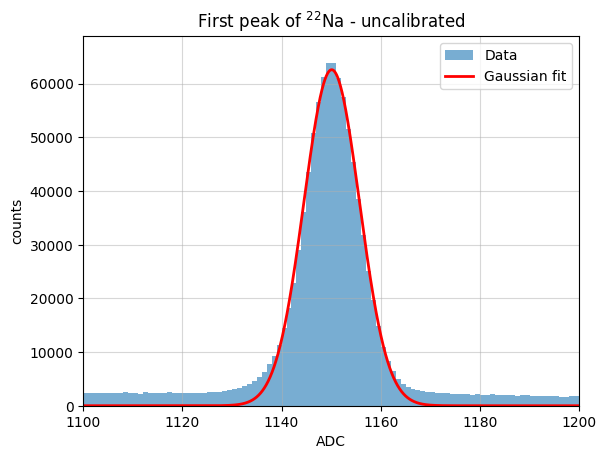

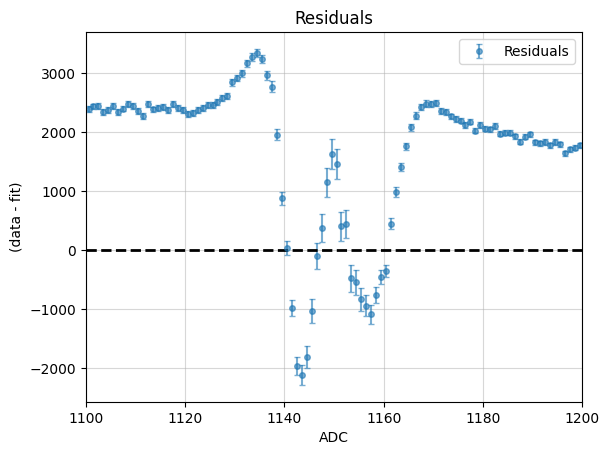

In [6]:
sodio_1peak = ben.normal(energy_sodio, 'ADC', 'counts', 'First peak of $^{22}$Na - uncalibrated', 1100, 1200, energy_sodio.max(), n=2)

In [7]:
# sodio_2peak = ben.normal(energy_sodio, 'ADC', 'counts', 'Second peak of $^{22}$Na - uncalibrated', 2800, 2950, energy_sodio.max())

In [8]:
# americio_peak = ben.normal(energy_americio, 'ADC', 'counts', 'Peak of $^{241}$Am - uncalibrated', 120, 150, energy_americio.max())

In [9]:
int(fondo2giorno.max())

16383

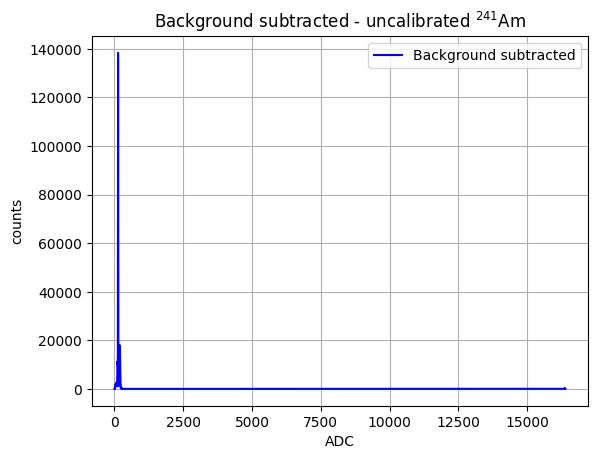

In [10]:
bin_americio, americio_fondo = ben.background(energy_americio, fondo2giorno, None, 'ADC', 'counts', 'Background subtracted - uncalibrated $^{241}$Am')

## efficienza HPGe

In [11]:
europio20min = uproot.open('group23\\20min-europio-gr23\\RAW\\DataR_20min-europio-gr23.root')
energy_europio20min =np.array(europio20min['Data_R;6']['Energy'].array())

C:\Users\Utente\AppData\Local\Temp\ipykernel_308\3061995950.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  energy_europio20min =np.array(europio20min['Data_R;6']['Energy'].array())


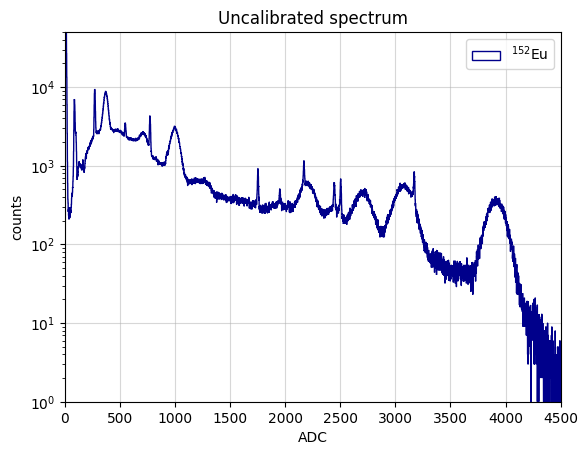

In [12]:
plt.hist(energy_europio20min, bins=energy_europio20min.max(), edgecolor='darkblue', histtype='step', lw=1, label="$^{152}$Eu")
plt.title('Uncalibrated spectrum')
plt.legend(loc='upper right')
plt.xlabel("ADC")
plt.ylabel("counts")
plt.xlim(0, 4500)
plt.ylim(1, 50000)
plt.yscale("log")
plt.grid(True, alpha=0.5)
plt.show()

In [2]:
k = 3
print(k)

3
